(optional)

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
os.chdir('/content/drive/MyDrive/work/ml_hw5')

# **HW5: Brain signal classification**
In *HW 5*, you need to finish:

1.  Model Implementation Part: Implement LSTM and EEGNet models to predict the label of each samples.

2.  Model Competition Part: Implementing a model to reach better accuracy performance.

In [3]:
import numpy as np
import os
import math
import csv
import matplotlib.pyplot as plt
# Import the packages you need here
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,LSTM
import time

In [4]:
data = np.load('data.npz')
label = np.load('label.npz')

In [5]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']

Y_train = label['Y_train']
Y_val = label['Y_val']

In [6]:
X_train.shape, X_val.shape, X_test.shape

((604, 22, 200), (152, 22, 200), (190, 22, 200))

In [7]:
Y_train.shape, Y_val.shape

((604, 1), (152, 1))

In [8]:
np.set_printoptions(threshold=sys.maxsize)

# Y_train = Y_train.reshape(604,)
# Y_train = Y_train.astype(int)
# Y_train = np.eye(6)[Y_train]


# Y_val = Y_val.reshape(152,)
# Y_val = Y_val.astype(int)
# Y_val = np.eye(6)[Y_val]

# display("-------------------------------------")

X_train = np.transpose(X_train, (0, 2, 1))
X_val = np.transpose(X_val, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))

X_train.shape, X_val.shape, X_test.shape,Y_train.shape, Y_val.shape, X_test.shape

((604, 200, 22),
 (152, 200, 22),
 (190, 200, 22),
 (604, 1),
 (152, 1),
 (190, 200, 22))

## Model Implementation Part

### LSTM

In [9]:
# Build your model here:


n_steps = 200
n_features = 22
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape = (200, 22)))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epoch=50
start = time.time()
history = model.fit(X_train, Y_train,batch_size = 32, epochs=epoch, validation_data=(X_val, Y_val))
stop = time.time()
print(f"Training time: {stop - start}s")
# history = model.fit(X_train, y_train, epochs=epoch)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                22272     
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 22,662
Trainable params: 22,662
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 [==============================] - 6s 78ms/step - loss: 1.6892 - accuracy: 0.3129 - val_loss: 1.5379 - val_accuracy: 0.3882
Epoch 2/50
19/19 [==============================] - 0s 17ms/step - loss: 1.3835 - accuracy: 0.4752 - val_loss: 1.4204 - val_accuracy: 0.4276
Epoch 3/50
19/19 [==============================] - 0s 21ms/step - loss: 1.2086 - accuracy: 0.5977 - val_loss: 1.3374 - val_accuracy: 0.4605
Epoch 4/50
19/19 [=======

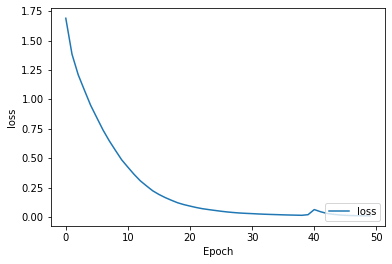

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')



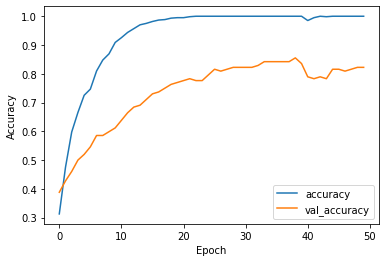

In [11]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis = 1)
print(pred_test)

6/6 [==============================] - 0s 5ms/step
[0 3 4 2 5 1 0 0 5 0 0 2 3 5 5 3 5 5 1 5 1 1 5 5 3 3 2 1 3 2 5 5 0 0 2 0 5
 5 2 2 4 0 4 4 2 2 3 0 4 2 2 4 3 3 4 3 5 2 0 1 4 5 1 1 4 3 1 2 1 4 5 4 2 4
 2 3 3 1 3 2 1 4 0 1 1 5 1 1 1 4 2 5 5 2 4 1 0 5 2 5 2 4 4 2 3 4 1 2 1 0 1
 1 2 4 3 3 1 4 1 1 5 5 3 1 3 0 0 0 3 1 0 5 0 2 3 4 0 1 3 3 5 0 2 5 4 1 3 3
 3 1 5 3 1 2 1 1 0 0 2 3 1 1 3 5 0 5 5 5 4 1 2 1 5 2 4 1 1 4 2 4 2 3 4 2 4
 3 0 1 1 1]


In [13]:
output = pred_test.reshape(190,1)
# display(output)
assert(output.shape == (190, 1))
np.savetxt('lstm_output.csv', output, delimiter=",")

### EEGNet

In [14]:
X_train = np.transpose(X_train, (0, 2, 1))
X_val = np.transpose(X_val, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))



display(X_val.shape)
# display(X_val[0])
display("--------------------------------------------------")
# X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1],X_val.shape[2])
# X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1],X_train.shape[2])
# X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1],X_test.shape[2])
display(X_val.shape)
# display(X_val[0])

(152, 22, 200)

'--------------------------------------------------'

(152, 22, 200)

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm

In [16]:
# Build your model here:
classes = 6
C = 22
T = 200
dropoutRate = 0.25
kernLength = 64
F1 = 16
D = 4
F2 = 32
norm_rate = 0.25
epoch = 50
input1 = Input(shape = (C, T, 1))

block1 = Conv2D(F1, (1, kernLength), padding = 'same',
                                input_shape = (C, T, 1),
                                use_bias = False)(input1)
block1 = BatchNormalization()(block1)
block1 = DepthwiseConv2D((C, 1), use_bias = False,
                                depth_multiplier = D,
                                depthwise_constraint = max_norm(1.))(block1)
block1 = BatchNormalization()(block1)
block1 = Activation('elu')(block1)
block1 = AveragePooling2D((1, 4))(block1)
block1 = Dropout(dropoutRate)(block1)

block2 = SeparableConv2D(F2, (1, 16),
                                use_bias = False, padding = 'same')(block1)
block2 = BatchNormalization()(block2)
block2 = Activation('elu')(block2)
block2 = AveragePooling2D((1, 8))(block2)
block2 = Dropout(dropoutRate)(block2)
flatten = Flatten(name = 'flatten')(block2)

dense = Dense(classes, name = 'dense',
                      kernel_constraint = max_norm(norm_rate))(flatten)
softmax = Activation('softmax', name = 'softmax')(dense)

model = Model(inputs=input1, outputs=softmax)
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

start = time.time()
history = model.fit(X_train, Y_train,batch_size = 32, epochs=epoch, validation_data=(X_val, Y_val))
stop = time.time()
print(f"Training time: {stop - start}s")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22, 200, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 22, 200, 16)       1024      
                                                                 
 batch_normalization (BatchN  (None, 22, 200, 16)      64        
 ormalization)                                                   
                                                                 
 depthwise_conv2d (Depthwise  (None, 1, 200, 64)       1408      
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 1, 200, 64)       256       
 hNormalization)                                                 
                                                             

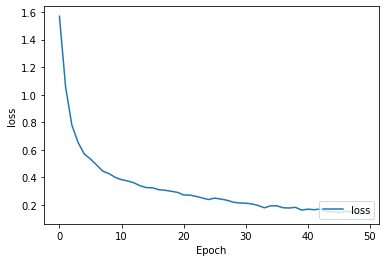

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

# plt.ylim([0.5, 1])
plt.legend(loc='lower right')



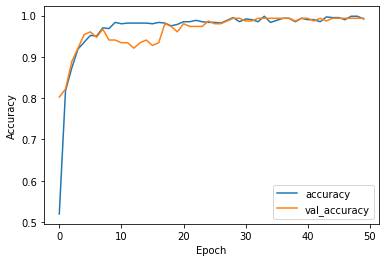

In [18]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis = 1)
print(pred_test)

6/6 [==============================] - 0s 8ms/step
[0 3 4 2 5 1 0 0 5 1 2 0 0 5 5 3 5 5 3 5 1 1 5 5 4 3 2 1 0 2 5 3 0 0 2 0 5
 5 2 2 4 0 4 4 2 0 3 0 4 2 2 4 4 3 4 0 5 2 0 1 3 5 1 1 4 3 1 2 0 4 5 4 0 3
 2 3 3 4 3 2 1 4 0 1 1 3 4 1 1 4 2 5 5 2 4 1 0 5 2 5 3 4 3 2 4 4 1 2 0 0 1
 0 2 4 3 4 1 4 1 1 5 5 3 1 3 0 0 1 3 1 0 5 0 2 3 2 2 0 3 3 5 0 2 5 4 0 3 3
 0 1 5 3 1 2 1 0 2 0 2 3 1 1 3 5 0 5 5 5 4 1 2 1 5 2 4 4 1 4 0 4 2 3 4 2 4
 0 0 1 0 1]


In [20]:
output = pred_test.reshape(190,1)
assert(output.shape == (190, 1))
np.savetxt('eegnet_output.csv', output, delimiter=",")

## Model Competition Part

In [21]:
# Build your model here:

# Build your model here:
classes = 6
C = 22
T = 200
dropoutRate = 0.25
kernLength = 64
F1 = 16
D = 4
F2 = 32
norm_rate = 0.5
epoch = 50
input1 = Input(shape = (C, T, 1))

block1 = Conv2D(F1, (1, kernLength), padding = 'same',
                                input_shape = (C, T, 1),
                                use_bias = False)(input1)
block1 = BatchNormalization()(block1)
block1 = DepthwiseConv2D((C, 1), use_bias = False,
                                depth_multiplier = D,
                                depthwise_constraint = max_norm(1.))(block1)
block1 = BatchNormalization()(block1)
block1 = Activation('elu')(block1)
block1 = AveragePooling2D((1, 4))(block1)
block1 = Dropout(dropoutRate)(block1)

block2 = SeparableConv2D(F2, (1, 16),
                                use_bias = False, padding = 'same')(block1)
block2 = BatchNormalization()(block2)
block2 = Activation('elu')(block2)
block2 = AveragePooling2D((1, 8))(block2)
block2 = Dropout(dropoutRate)(block2)
flatten = Flatten(name = 'flatten')(block2)

dense = Dense(classes, name = 'dense',
                      kernel_constraint = max_norm(norm_rate))(flatten)
softmax = Activation('softmax', name = 'softmax')(dense)

model = Model(inputs=input1, outputs=softmax)
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,batch_size = 32, epochs=epoch, validation_data=(X_val, Y_val))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 22, 200, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 200, 16)       1024      
                                                                 
 batch_normalization_3 (Batc  (None, 22, 200, 16)      64        
 hNormalization)                                                 
                                                                 
 depthwise_conv2d_1 (Depthwi  (None, 1, 200, 64)       1408      
 seConv2D)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 1, 200, 64)       256       
 hNormalization)                                                 
                                                           

In [22]:
output = pred_test.reshape(190,1)
assert(output.shape == (190, 1))
np.savetxt('competition_output.csv', output, delimiter=",")